In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage

# instantiate
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",    # choose your model
    temperature=0.7,             # adjust how “creative” the output is
    max_tokens=None,
    timeout=None,
    max_retries=2,
    google_api_key=""       # pass your key or rely on env var
)

# example: simple human message
msg = HumanMessage(content="Explain what design patterns are in Python.")

response = llm.invoke([msg])
print(response.content)


## Design Patterns in Python: A Blueprint for Reusable Solutions

Design patterns are reusable solutions to commonly occurring problems in software design. They represent best practices that have been developed over time by experienced developers.  They're not code, libraries, or frameworks; they are blueprints or templates that you can adapt to solve specific design challenges in your code.

Think of them as a common vocabulary for developers to discuss solutions.  Instead of saying, "I'm creating a system where objects can be created through a central factory without specifying the exact class of object that will be created," you can simply say, "I'm using the Factory pattern."

**Why Use Design Patterns?**

*   **Reusability:**  Design patterns provide tried-and-tested solutions, reducing the need to reinvent the wheel for common problems.
*   **Maintainability:** Code using design patterns is often more organized, easier to understand, and easier to modify.
*   **Readability:** Des

In [2]:
from pydantic import BaseModel, create_model
from typing import List, Dict, Any, Type

# Example dict schema
response_format = {
    "name": {"type": "string"},
    "age": {"type": "integer"},
    "hobbies": {"type": "array", "items": {"type": "string"}}
}

# Mapping from schema types to Python types
type_map = {
    "string": str,
    "integer": int,
    "number": float,
    "boolean": bool,
    "array": list,
    "object": dict,
}

# Function to recursively convert schema to type
def schema_to_type(schema: Dict[str, Any]) -> Any:
    t = schema["type"]
    if t == "array":
        item_type = schema_to_type(schema["items"])
        return List[item_type]
    return type_map[t]

# Build fields
fields = {k: (schema_to_type(v), ...) for k, v in response_format.items()}
print(fields)

# Create Pydantic model dynamically
Person: Type[BaseModel] = create_model("Person", **fields)

# Test it
person = Person(name="Alice", age=30, hobbies=["reading", "coding"])
print(person)


{'name': (<class 'str'>, Ellipsis), 'age': (<class 'int'>, Ellipsis), 'hobbies': (typing.List[str], Ellipsis)}
name='Alice' age=30 hobbies=['reading', 'coding']


In [5]:
dict(person), type(person)

({'name': 'Alice', 'age': 30, 'hobbies': ['reading', 'coding']},
 __main__.Person)

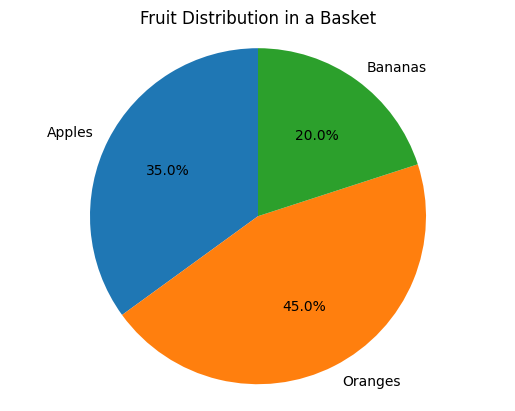

In [ ]:
s = """```python
import matplotlib.pyplot as plt

# Data for the pie chart
fruits = ['Apples', 'Oranges', 'Bananas']
proportions = [35, 45, 20]

# Create the pie chart
plt.pie(proportions, labels=fruits, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Fruit Distribution in a Basket')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()
```"""

exec(s.strip("```python").strip("```").strip("\n"))

In [4]:
s.strip("```python").strip("```").strip("\n")

"import matplotlib.pyplot as plt\n\n# Data for the pie chart\nfruits = ['Apples', 'Oranges', 'Bananas']\nproportions = [35, 45, 20]\n\n# Create the pie chart\nplt.pie(proportions, labels=fruits, autopct='%1.1f%%', startangle=90)\n\n# Add a title\nplt.title('Fruit Distribution in a Basket')\n\n# Ensure the circle's proportion\nplt.axis('equal')\n\n# Display the chart\nplt.show()"

In [5]:
import matplotlib.pyplot as plt

In [ ]:
exec("import matplotlib.pyplot as plt")

SyntaxError: invalid syntax (<string>, line 1)

In [ ]:
from langgraph.graph import Graph, END